In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.metrics import classification_report
from scipy.spatial.distance import cosine
%matplotlib inline

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df['class'] = df.label.apply(lambda x: iris.target_names[x])
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,class
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


C:\Users\Administrator\Anaconda3\envs\nlp\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


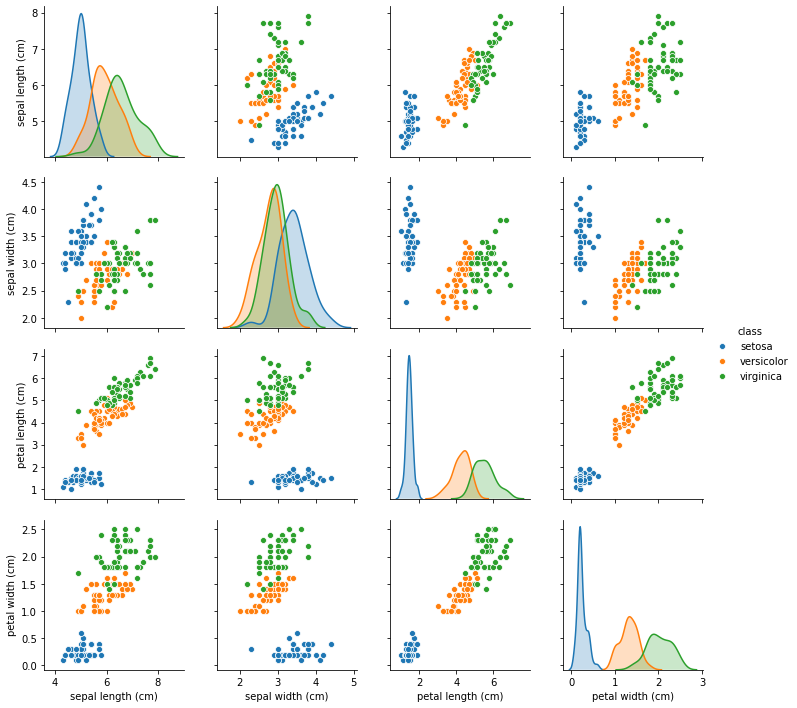

In [28]:
sns.pairplot(df.iloc[:,[0,1,2,3,5]], hue='class', size=2.5)

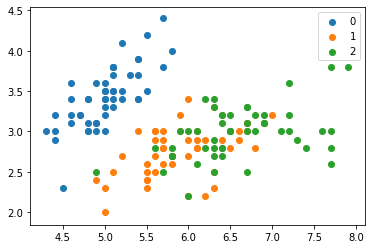

In [29]:
plt.scatter(df.iloc[:50,0], df.iloc[:50, 1], label='0')
plt.scatter(df.iloc[50:100,0], df.iloc[50:100, 1], label='1')
plt.scatter(df.iloc[100:150,0], df.iloc[100:150, 1], label='2')
plt.legend()
plt.show()

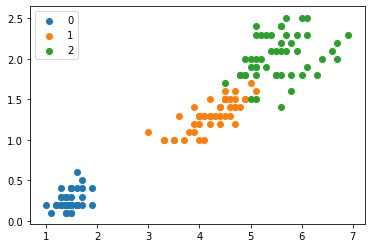

In [30]:
plt.scatter(df.iloc[:50,2], df.iloc[:50,3], label='0')
plt.scatter(df.iloc[50:100,2], df.iloc[50:100, 3], label='1')
plt.scatter(df.iloc[100:150,2], df.iloc[100:150, 3], label='2')
plt.legend()
plt.show()

In [55]:
data = np.array(df.iloc[:100, [0,1,-2]])
X, y = data[:, :-1], data[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((80, 2), (20, 2), (80,), (20,))

## 手动实现

In [74]:
class KNN:
    def __init__(self, Xtrain ,ytrain , nn=3, similarity_method = np.linalg.norm):
        self.n = nn
        self.Xtrain = Xtrain
        self.ytrain = ytrain
        self.sm = similarity_method
    
    def predict(self, X):
        # 1.获取待测点与所有已知点的距离
        if self.sm == np.linalg.norm:
            initial_nn = [(self.sm(X - Xtrain[i]), ytrain[i]) for i in range(len(self.Xtrain))]
        else:
            initial_nn = [(self.sm(X, Xtrain[i]), ytrain[i]) for i in range(len(self.Xtrain))]
        # 2.排序获取距离最小的前 nn 个点
        # 3.对nn个点进行类别计数，所属同一类最多个数的类为待测点预测的类
        sorted_ = sorted(initial_nn, key=lambda x: x[0])
        prediction = Counter(k[1] for k in sorted_[:self.n]).most_common()[0][0]
        return prediction
    
    def score(self, Xtest, ytest):
        ypred = [self.predict(x) for x in Xtest]
        result = np.mean(ypred==ytest)
        return round(result, 3)

In [69]:
clf = KNN(Xtrain, ytrain)

In [71]:
clf.score(Xtest,ytest)

1.0

In [59]:
test_dot = [6., 3.]
clf.predict(test_dot)

1.0

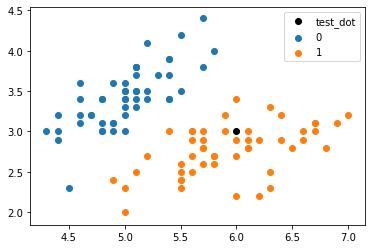

In [60]:
plt.scatter(df.iloc[:50,0], df.iloc[:50, 1], label='0')
plt.scatter(df.iloc[50:100,0], df.iloc[50:100, 1], label='1')
plt.plot(test_dot[0], test_dot[1], 'ko', label='test_dot')
plt.legend()
plt.show()

In [73]:
# 采用不同距离策略
clf2 = KNN(Xtrain, ytrain, similarity_method=cosine)
clf2.score(Xtest, ytest)

1.0

## sklearn内置类实现

In [39]:
data = np.array(df.iloc[:, [0,1,-1]])
X, y = data[:, :-1], data[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.2)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((120, 2), (30, 2), (120,), (30,))

In [40]:
clf = KNC(n_neighbors=7)
clf.fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

0.8333333333333334

In [41]:
ypred = clf.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.89      0.67      0.76        12
   virginica       0.60      0.86      0.71         7

    accuracy                           0.83        30
   macro avg       0.83      0.84      0.82        30
weighted avg       0.86      0.83      0.84        30



这组数据的可视化为4x4图中的2,1，对1类和2类的花型分类准确率较低。

采用sepal length 和 petal length的组合数据进行训练，即对应4x4中的（3,1）图。

In [6]:
data = np.array(df.iloc[:,[0,2,-1]])
X, y = data[:,:-1], data[:,-1]
Xtrain,Xtest, ytrain, ytest= train_test_split(X, y, test_size=.2)


In [7]:
clf = KNC()
clf.fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

0.9666666666666667

In [8]:
ypred = clf.predict(Xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.93      0.96        14
   virginica       0.75      1.00      0.86         3

    accuracy                           0.97        30
   macro avg       0.92      0.98      0.94        30
weighted avg       0.97      0.97      0.97        30



效果好很多，接下来展示所有组合。

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [35]:
def get_all_score():
    index = [[i[0], i[1], -1] for i in combinations(range(4),2)]
    for i in index:
        data = np.array(df.iloc[:, i])
        X, y = data[:,:-1], data[:, -1]
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.35)
        clf = KNC()
        clf.fit(Xtrain, ytrain)
        print(f"Index {i} with score:{round(clf.score(Xtest, ytest),3)}")
        print('\n')
        ypred = clf.predict(Xtest)
        print(classification_report(ytest, ypred))
        print('*' * 50)

In [36]:
get_all_score()

Index [0, 1, -1] with score:0.698


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.47      0.60      0.53        15
   virginica       0.62      0.50      0.56        20

    accuracy                           0.70        53
   macro avg       0.70      0.70      0.69        53
weighted avg       0.71      0.70      0.70        53

**************************************************
Index [0, 2, -1] with score:0.981


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      1.00      0.97        18
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

**************************************************
Index [0, 3, -1] with score:0.962


              precision    r